{'cpu'}
{'2.5.1+cpu'}
{40000}
{40000}
{10000}
{10000}
Test - Epoch: 0 | Loss: 0.5642188191413879 | Test Loss: 0.6829596757888794
Test - Epoch: 10000 | Loss: 0.4482583999633789 | Test Loss: 0.547031581401825
Test - Epoch: 20000 | Loss: 0.33228862285614014 | Test Loss: 0.4110942780971527
Test - Epoch: 30000 | Loss: 0.21632809937000275 | Test Loss: 0.27516621351242065
Test - Epoch: 40000 | Loss: 0.10036768019199371 | Test Loss: 0.13923820853233337
Test - Epoch: 50000 | Loss: 0.008104581385850906 | Test Loss: 0.02181653119623661
Test - Epoch: 60000 | Loss: 0.004437185823917389 | Test Loss: 0.010388774797320366
Test - Epoch: 70000 | Loss: 0.0010815262794494629 | Test Loss: 0.0025316195096820593
Test - Epoch: 80000 | Loss: 8.83875873114448e-06 | Test Loss: 5.604547368420754e-06
Test - Epoch: 90000 | Loss: 8.83875873114448e-06 | Test Loss: 5.604547368420754e-06


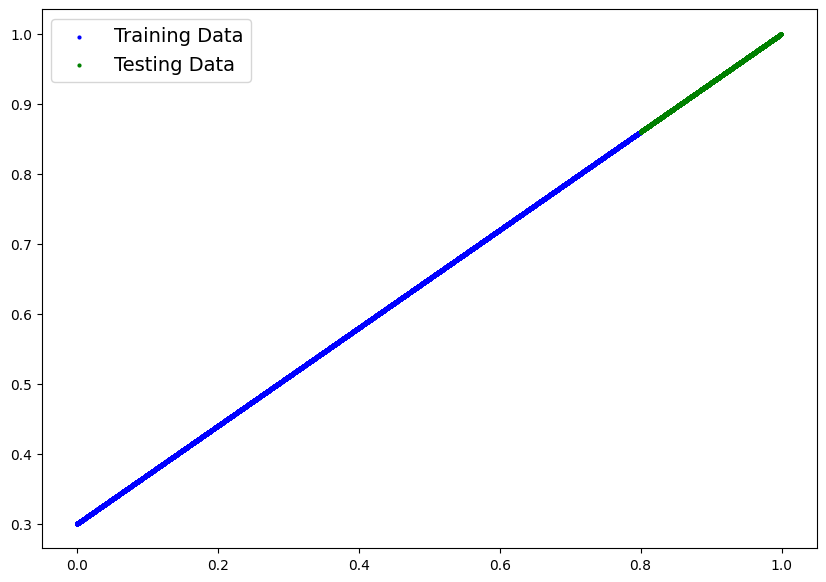

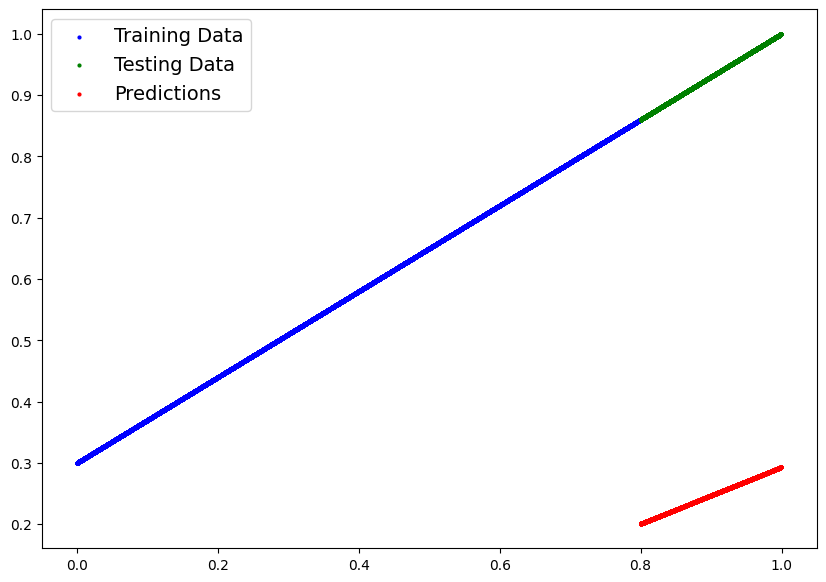

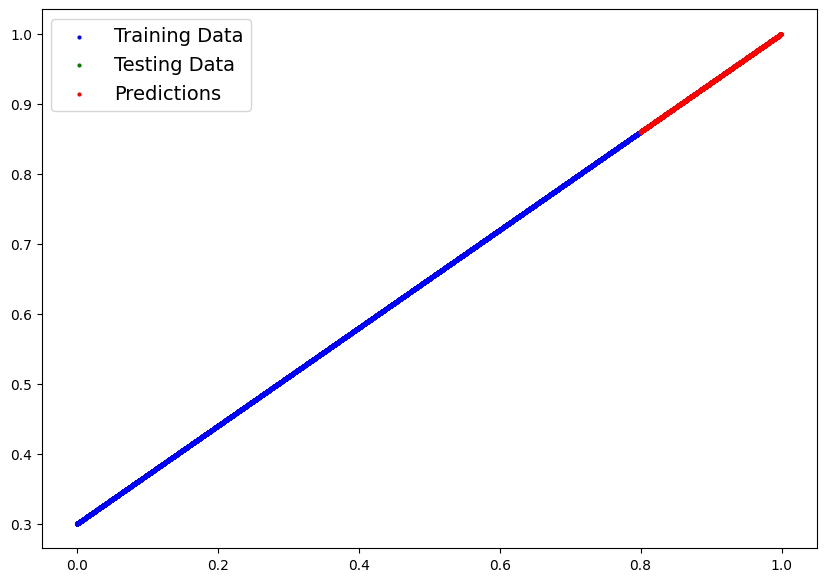

In [1]:
# We are going to get through an initial workflow
# for a basic pytorch model
# While we are using Jupyter we will make this in a single cell

# We will need a few things

# This is running local, windows 11, conda env with python 3.12, i7-14700K & 4070 Super

#
#
#

# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

# Cuda or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print({device})

# Validate PyTorch ver
print({torch.__version__})

# Seed generator
RANDOM_SEED = 50

# Create our own testing data to try to model/predict
# We will want some known/static params to generate the test data
# This is where we will use our loss function and optimizer to get our predictions down to
# Minimize the loss to get down to these features/labels
weight = 0.7
bias = 0.3
# Create test data
start = 0
end = 1
step = 0.00002 # Lets push on the gpu a little bit
X = torch.arange(start, end, step).unsqueeze(dim=1) # features, remove singleton dims
y = weight * X + bias # This is the linear regression formula, straight line

# Data training and test sets, we need to split data
train_split = int(0.8 * len(X)) # 80% is data samples
X_train, y_train = X[:train_split], y[:train_split] # Train set features and labels
X_test, y_test = X[train_split:], y[train_split:] # Test set features and labels
# lets check the len of each, 40k train, 10k test on each side
print ({len(X_train)})
print ({len(y_train)})
print ({len(X_test)})
print ({len(y_test)})

# We will want to visualize the data before training and after
# Plot the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10,7)) # Numbers are technically inches
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14});

# Generate the graph from the above
plot_predictions()

# Build a model, validate the contents of that model
# Lets subclass nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Model params
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
    # Forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # This is the LR formula

# Gen a random seed (well a static random seed)
torch.manual_seed(RANDOM_SEED)
# Instantiate the model
model_0 = LinearRegressionModel()
model_0.state_dict()

# Make predictions
# We need to turn on inference mode
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

# Train the model with a training and testing loop
# We need to add a loss function (How wrong is the model)
# And an optimizer (How much to adjust the loss to become accurate)
loss_fn = nn.L1Loss() # There are many loss functions to choose
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.00001)
# There are many optimizers to choose, lr = learning rate, how much it will adjust
# These are hyper params

# We need another random-ish seed generated
torch.manual_seed(RANDOM_SEED)

# Set the Epochs or how many times the model will be stepped through
epochs = 100000 # I do not expect much to change with the size we have, this is a start

# We want to track epochs and other values, this will be handy in a moment
epoch_count = []
loss_values = []
test_loss_values = []

# Training/testing loop
for epoch in range(epochs):
    model_0.train() # This enables gradient tracking
    y_pred = model_0(X_train) # pass in data
    loss = loss_fn(y_pred, y_train) # check diff between test/train labels
    optimizer.zero_grad() # zero before each step
    loss.backward() # backpropagation on the loss
    optimizer.step()

    # Testing portion of the loop
    model_0.eval() # Turn onn various features as we are now in evaluation mode
    with torch.inference_mode(): # turns on gradient tracking
        test_pred = model_0(X_test) # pass in test features
        test_loss = loss_fn(test_pred, y_test) # calc the loss between pred and test labels
    # Lets get a print out of whats being corrected
    if epoch % (epochs / 10) == 0: # if the modulo of any amount / 10 then print
        # Print test data
        print(f"Test - Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # Update our counts
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_values)

# Check our original predictions against the actual trained model predictions

with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions = y_preds_new);


# GPU only used about 25 watts and most of that is recording this video :)















